## **Logistic Regression**

Logistic Regression is a model that returns the probability of a certain discrete outcome based on input variables. Just in the way linear regression tries to fit a line to data, logistic regression tries to fit a 'squiggle' or logistic function to discrete data. The logistic function tells us the probability that a certain outcome (often binary) has, based on input variables. We often use these probabilities for classification problems by setting a decision boundary that classifies our data based on the probabilities. The logistic function maps all real values into the range from 0 to 1 in the y-axis, and the equation is the following: $$ $$ Let's see a small dataset that would be a great candidate for logistic regression.

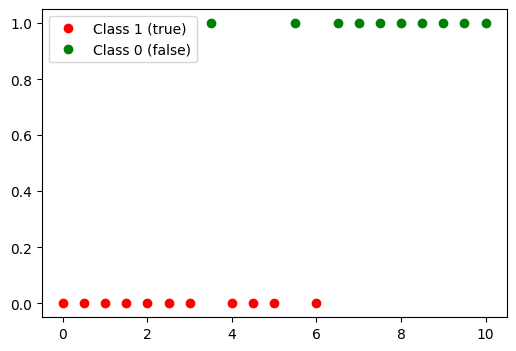

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 21)
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])
idx_0 = np.argwhere(y == 0).flatten()
idx_1 = np.argwhere(y == 1).flatten()

plt.figure(figsize = (6,4))
plt.plot(x[idx_0], y[idx_0], 'ro', label = 'Class 1 (true)')
plt.plot(x[idx_1], y[idx_1], 'go', label = 'Class 0 (false)')
plt.legend()
plt.show()

In this example dataset, we are trying to model our discrete variable (binary) as a function of an input variable, continious in this case. Just by looking at the data, we can see that, although the data has some exceptions, if the independent variable is lower than 5, it is most likely to be in class 0, and if the variable is higher than 5, it is most likely to be in class 1. Further on, we will estimate the parameters that fit the sigmoid to the data, for now, the parameters have already been estimated and we can see how the sigmoid fits to the data. The equation for the logistic function is defined as: $$ p(X) = \frac{1}{1 + e^{-\beta X}} $$ where $p(X)$ is the probability (dependent variable), $\beta$ is our parameter vector, and $X$ is our dependent variable vector or design matrix, similar to how a linear regression line is expressed. Let's see how this looks when applied to our dataset.

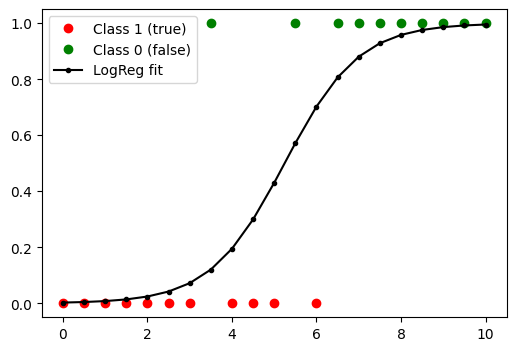

In [2]:
px = 1/(1 + np.exp(-1*(x*1.14 - 5.98)))

plt.figure(figsize = (6,4))
plt.plot(x[idx_0], y[idx_0], 'ro', label = 'Class 1 (true)')
plt.plot(x[idx_1], y[idx_1], 'go', label = 'Class 0 (false)')
plt.plot(x, px, 'k.-',label = 'LogReg fit')
plt.legend()
plt.show()

As we can see from the graph, our logistic regression line exhibits a pattern that is similar to the one in our data. We must note that the output of the logistic function are probabilities and not classifications, the classes come as an extra step for classification problems and they are determined by setting a decision boundary. For example, we could say that if the output of the logit function is less than 0.5, or a probability of 50%, the predicted class is 0, and if the probability is greater than or equal to 0.5, we predict a 1. The predicted class vector for our logit function is shown below and we can see how it compares to the actual classes of the data.

In [3]:
pred = np.array([0 if p < 0.5 else 1 for p in px])

np.set_printoptions(precision = 2)
print(f'Predicted classes: {pred}\nActual classes: {y}')

Predicted classes: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Actual classes: [0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1]


We can notice that there are only a few samples where the classification was incorrect, mainly when p(x) was near 0.5. For the dataset above, we took the parameter vector $\beta$ as given, now we will see where this parameter vector comes from and how logistic regression can transform into a linear model.

To start off, we define the 'logit' function. The logit function is a way of expressing probabilities as odds, or $log$(odds) to be more precise. Probabilities are expressed as the ratio of an event ocurring to the total number of events. We use counts as a way to express events, so, if we have a count of 3 times the event happened out of 6 total events, we would have a probability of $\frac{3}{6}$, or 0.5. Odds are expressed as the ratio of an event ocurring to the event not ocurring. So in the example above, the event happened 3 times and didn't happen 3 times, so the odds would be $\frac{3}{3}$ or 1 (commonly expressed as 1 to 1 odds, as in how many times the event should happen for every time the event does not happen). we can express the odds in terms of probability with the equation: $$ odds(p) = \frac{p}{1 - p}$$ where $p$ is the probability of an event happening. If we analyze the range of our functions, we will quickly notice that $p \in [0, 1]$. If the p is really close to 0 (not very likely to happen), then $\frac{p}{1 - p}$ would approximate to 0, but on the other hand, if p is really close to 1, $\frac{p}{1 - p}$ would aproximate $\infty$, so the range of our odds function would be $odds(p) \in [0, \infty)$. It would be nice if we could make this range go from $- \infty$ to $\infty$ so that it has the same range as any other linear function, and it would also be nice if we could do it in a way that clearly expresses the quantification of the opposite odds, so that odds that are 3 to 1 can be easily distinguished as being the opposite of 1 to 3, since odds of 3 and 0.33 are not numerically correlated without the equation that describes them.

The solution? Take the natural logarithm of the odds, as simple as that. The log of the odds would give us the range that we want, and make our relationships linear, simplifying the visualizations and giving us a path to finding the linear coefficients that give us the best fitting squiggle. Taking the log of the odds in term of the probabilities is the logit function that we talked about, and it is expressed as: $$ logit(p) = log(\frac{p}{1-p})$$

Knowing that for our logistic function $ p(X) = \frac{1}{1 + e^{-\beta X}} $, the logit of p would be: $$ logit(p) = log(\frac{\frac{1}{1 + e^{-\beta X}}}{1 - \frac{1}{1 + e^{-\beta X}}} )$$
$$logit(p) = log(\frac{1}{1 + e^{-\beta X}}) - log(1 - \frac{1}{1 + e^{-\beta X}})$$ 
$$logit(p) = log(\frac{1}{1 + e^{-\beta X}}) - log(\frac{1 + e^{-\beta X}-1}{1 + e^{-\beta X}})$$ 
$$logit(p) = log(1) - log(1 + e^{-\beta X}) - log(e^{-\beta X}) + log(1 + e^{-\beta X})$$ 
$$logit(p) = log(1) - log(e^{-\beta X})$$ 
$$logit(p) = 0 - (-\beta X)$$
$$logit(p) = \beta X$$  

Logistic regression focuses on finding the parameter vector $\beta$ with Maximum Likelihood Estimation (MLE). MLE considers a label vector $y$ of size n, which is the number of samples in the data. Each element can be either a 0 or a 1, so that they either belong to class 1 or not. For samples that are labeled as 1, MLE estimates $\beta$ so that the product of the probabilities in the vector $p(X)$ is as close to 1 as possible, and for sampled that are labeled as 0, estimates $\beta$ so that 1 - $p(X)$ is as close to 1 as possible. The equation that describes the likelihood is: $\prod_{i = 1}^n p(x_i)$ where $y_i = 1$ and $\prod_{i = 1}^n 1-p(x_i)$ when $y_i = 0$. We can combine these equations as: 
$$L(\beta) = \prod_{i = 1}^n p(x_i) \times \prod_{i = 1}^n 1-p(x_i) $$
$$L(\beta) = \prod_{i = 1}^n p(x_i)^{y_i} (1-p(x_i))^{1-y_i} $$

The equation above is congruent with the probability mass function of a Bernoulli distribution on $p(x_i)$. We can now obtain the log-likelihoood function by taking the log on both sides, simplifying the exponents and turning the products into summations as following:
$$ log(L(\beta)) = \prod_{i = 1}^n log(p(x_i)^{y_i} (1-p(x_i))^{1-y_i}) $$
$$ l(\beta) = \sum_{i = 1}^n log(p(x_i)^{y_i}) + log((1-p(x_i))^{1-y_i}  $$
$$ l(\beta) = \sum_{i = 1}^n y_i log(p(x_i)) + (1-y_i)log(1-p(x_i))  $$

Substituting the logistic function for $p(x_i)$ we get:
$$ l(\beta) = \sum_{i = 1}^n y_i log(\frac{1}{1 + e^{-\beta x_i}}) + (1-y_i)log(1-\frac{1}{1 + e^{-\beta x_i}})  $$
$$ l(\beta) = \sum_{i = 1}^n y_i log(\frac{1}{1 + e^{-\beta x_i}}) + (1-y_i)log(\frac{e^{-\beta x_i}}{1 + e^{-\beta x_i}})  $$
$$ l(\beta) = \sum_{i = 1}^n y_i log(\frac{1}{1 + e^{-\beta x_i}}) + log(\frac{e^{-\beta x_i}}{1 + e^{-\beta x_i}}) - y_i log(\frac{e^{-\beta x_i}}{1 + e^{-\beta x_i}}) $$
$$ l(\beta) = \sum_{i = 1}^n y_i[(log(\frac{1}{1 + e^{-\beta x_i}}) - log(\frac{e^{-\beta x_i}}{1 + e^{-\beta x_i}}) )] + log(\frac{e^{-\beta x_i}}{1 + e^{-\beta x_i}}) $$
$$ l(\beta) = \sum_{i = 1}^n y_i[log(e^{\beta x_i})] + log(\frac{1}{1 + e^{\beta x_i}}) $$
$$ l(\beta) = \sum_{i = 1}^n y_i \beta x_i - log(1 + e^{\beta x_i}) $$


This is the final form of the log likelihood function and we need to find the value of $\beta$ that maximizes this function. Unfortunately, this equation is not linear, like the function that is minimized by least squares when computing $\beta$ for linear regression, this is a trascendental function and there is not a closed form solution, but we can use numerical methods to approximate the solution. We will be using the Newton-Raphson method but there are plenty of other ones. The Newton-Raphson method is defined for $\beta$ as:
$$ \beta^{(t+1)} = \beta^t - \frac{\frac{d}{d\beta}l(\beta^{(t)})}{\frac{d^2}{d\beta^2}l(\beta^{(t)})} $$
Using this method, we can iterate until the value for the parameter vector $\beta$ converges. Let's derive our log-likelihood function with respect to $\beta$ and get our equations.
$$ \frac{d}{d\beta}l(\beta) = \sum_{i = 1}^n \frac{d}{d\beta}[y_i \beta x_i - log(1 + e^{\beta x_i})] $$
$$ \frac{d}{d\beta}l(\beta) = \sum_{i = 1}^n \frac{d}{d\beta}[y_i \beta x_i] -\frac{d}{d\beta} [log(1 + e^{\beta x_i})] $$
$$ \frac{d}{d\beta}l(\beta) = \sum_{i = 1}^n y_i x_i -(\frac{1}{1 + e^{\beta x_i}}e^{\beta x_i}x_i) $$
$$ \frac{d}{d\beta}l(\beta) = \sum_{i = 1}^n y_i x_i -(\frac{1}{1 + e^{-\beta x_i}}x_i) $$
$$ \frac{d}{d\beta}l(\beta) = \sum_{i = 1}^n x_i(y_i -\frac{1}{1 + e^{-\beta x_i}}) $$
$$ \frac{d}{d\beta}l(\beta) = \sum_{i = 1}^n x_i(y_i -p(x_i)) $$

Now, we compute the second derivative with respect to $\beta$, called the Hessian matrix. 
$$ \frac{d^2}{d\beta^2}l(\beta) = \sum_{i = 1}^n \frac{d}{d\beta}[x_i(y_i -p(x_i))] $$
$$ \frac{d^2}{d\beta^2}l(\beta) = \sum_{i = 1}^n \frac{d}{d\beta}[-p(x_i)x_i] $$
$$ \frac{d^2}{d\beta^2}l(\beta) = \sum_{i = 1}^n \frac{d}{d\beta}[-\frac{1}{1 + e^{-\beta x_i}}x_i] $$

Using the quotient rule, we get: 
$$ \frac{d^2}{d\beta^2}l(\beta) = -\sum_{i = 1}^n [\frac{1}{1 + e^{-\beta x_i}}]^2 e^{-\beta x_i} (x_i) x_i $$
$$ \frac{d^2}{d\beta^2}l(\beta) = -\sum_{i = 1}^n [\frac{1}{1 + e^{-\beta x_i}}][\frac{ e^{-\beta x_i}}{1 + e^{-\beta x_i}}]x_i^T x_i $$
$$ \frac{d^2}{d\beta^2}l(\beta) = -\sum_{i = 1}^n p(x_i)(1-p(x_i))x_i^T x_i $$

## **Vectorization**
We can now convert these derivatives into their vectorized forms to remove the summations. The vectorized representation of the first order derivative is:
$$ \frac{d}{d\beta}l(\beta) = X^T(y - P(X)) $$ 
and the vectorized form of the second order derivative (Hessian matrix) is:
$$ \frac{d^2}{d\beta^2}l(\beta) = -X^T P(X) (1-P(X)) X  $$
$$ \frac{d^2}{d\beta^2}l(\beta) = -X^T W X  $$
where $X$ is the design matrix, $y$ is the vector of class labels taken from our dataset, $P(X)$ is the vector of predicted probabilities based on our design matrix and $\beta$, and $W$ is the vector $\hat{y}(1-\hat{y})$.

Plugging these equations on the Newton-Raphson method gives us:
$$ \beta^{(t+1)} = \beta^{(t)} - \frac{X^T(y - P(x)^{(t)})}{-X^T W^{(t)} X } $$
$$ \beta^{(t+1)} = \beta^{(t)} - X^T(y - P(X)^{(t)})(-X^T W^{(t)} X)^{-1} $$

We can now initialize the parameter vector $\beta$ to a random value and use this equation over multiple iterations in order to find the optimal $\beta$. Now let's do the iteration in code and see the results.

In [4]:
beta = np.random.normal(0, 1, 2)
des = np.hstack((np.ones((x.shape[0], 1)), x.reshape(-1,1)))
print(f'Initial β: {beta}')

it = range(500)
int_hist = []
coef_hist = []
for _ in it:
    Px = 1/(1 + np.exp(-1*np.dot(beta, des.T)))
    W = np.dot(Px, 1-Px)
    hes = np.linalg.inv(-1*np.dot(des.T, des)*W)
    der = np.dot(des.T, (y-Px))
    par = np.dot(der, hes)
    beta -= par
    int_hist.append(beta[0])
    coef_hist.append(beta[1])

print(f'β after {len(it)} iterations: {beta}')

Initial β: [-0.54 -0.06]
β after 500 iterations: [-5.97  1.14]


As you can see, we initialized the parameter vector to random values sampled from a normal distribution with mean 0 and $\sigma$ = 1 and it eventually converged into the final values. Let's plot the values of $\beta$ on the different iterations of the algorithm.

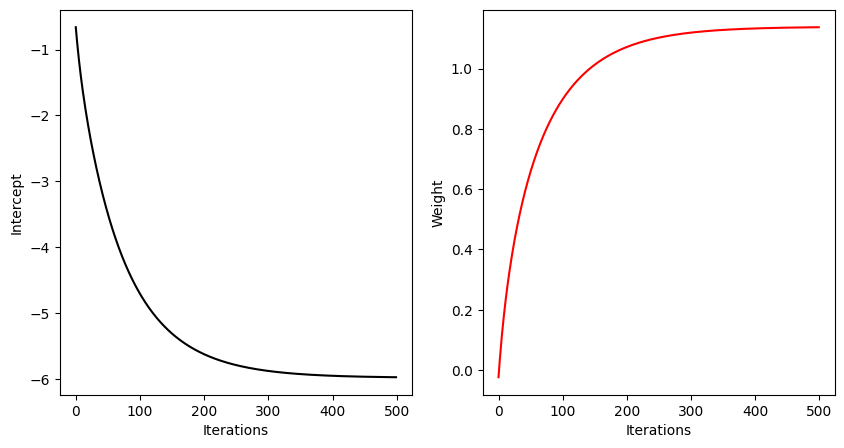

In [5]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10,5)
ax = axes[0]
ax.plot(it, int_hist, 'k')
ax.set_xlabel('Iterations')
ax.set_ylabel('Intercept')
ax = axes[1]
ax.plot(it, coef_hist, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Weight')
plt.show()

 After about 500 iterations, the values for $\beta$ converged to the optimal values, which are the same as the ones shown at the begining, which were taken from scikit-learn's LogisticRegression model with no penalty. Let's see the implementation of this model.

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = None)
lr.fit(x.reshape(-1, 1), y)

skbeta = np.concatenate((lr.intercept_, lr.coef_.reshape(-1)))
print(f'scikit-learn\'s estimation of β: {skbeta}')

scikit-learn's estimation of β: [-5.98  1.14]


As we can see, the $\beta$ given by the Newton-Raphson method is the same as the one obtained with scikit-learn, meaning that both methods give us the maximum likelihood fit. It is important to note that scikit-learn adds a regulatization penalty by default (L2) to avoid overfitting and increase accuracy. This term changes the resulting $\beta$ vector and we can ommit it by setting the penalty to None.

## **Logistic regression for multiple dependent variables**
Just as linear regression can fit a line with multiple dependent features, logistic regression can fit a sigmoid function in higher dimensions, and since we already analyzed how we can estimate the parameter vector $\beta$ in a vectorized form, the implementation is valid for any number of dimensions and it should be easy to implement. Let's visualize this with a small dataset.

In [7]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We will only use petal length and width for our logistic regression problem, and determine if the species is Virginica, or not. We will curate our dataset and plot it.

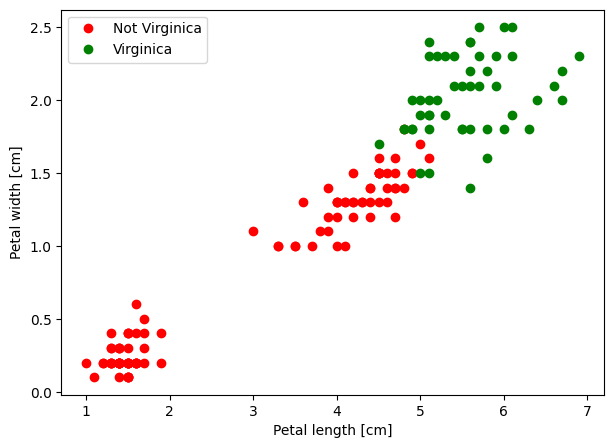

In [8]:
X = df[['petal_length', 'petal_width']].values
y = np.array(list(map(lambda x: 1 if x == 'virginica' else 0, df['species'].values)))
idx_0 = np.argwhere(y == 0).flatten()
idx_1 = np.argwhere(y == 1).flatten()
plt.figure(figsize = (7, 5))
plt.plot(X[idx_0, 0], X[idx_0, 1], 'ro', label = 'Not Virginica')
plt.plot(X[idx_1, 0], X[idx_1, 1], 'go', label = 'Virginica')
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend()
plt.show()

We can see a clear separation between samples that are indeed of the Virgnica species, and samples that are not, based on these two variables only. Let's get the coefficients using scikit-learn for logisic regression on this dataset and see the results.

In [9]:
model = LogisticRegression(penalty = None)
model.fit(X, y)

skbeta = np.concatenate((model.intercept_, model.coef_.reshape(-1)))
print(f'scikit-learn\'s estimation of β for iris dataset: {skbeta}')

scikit-learn's estimation of β for iris dataset: [-45.27   5.75  10.45]


We have the optimal coefficients for our logistic regression with 2 independent variables. Now, we will estimate them using MLE with Newton-Raphson method to see if they converge to the same values.

In [12]:
beta = np.random.normal(0, 2, X.shape[1] + 1)
des = np.hstack((np.ones((X.shape[0], 1)), X))
print(f'Initial β: {beta}')

it = range(100000)
int_hist = []
coef1_hist = []
coef2_hist = []
for _ in it:
    Px = 1/(1 + np.exp(-1*np.dot(beta, des.T)))
    W = np.dot(Px, 1-Px)
    hes = np.linalg.inv(-1*np.dot(des.T, des)*W)
    der = np.dot(des.T, (y-Px))
    par = np.dot(der, hes)
    beta -= par
    int_hist.append(beta[0])
    coef1_hist.append(beta[1])
    coef2_hist.append(beta[2])

print(f'β after {len(it)} iterations: {beta}')

Initial β: [-0.79  2.88 -3.  ]
β after 100000 iterations: [-45.19   5.74  10.43]


The resulting parameter vector is pretty much the same as the one estimated with scikit-learn. Let's visualize how each parameter changed over every iteration.

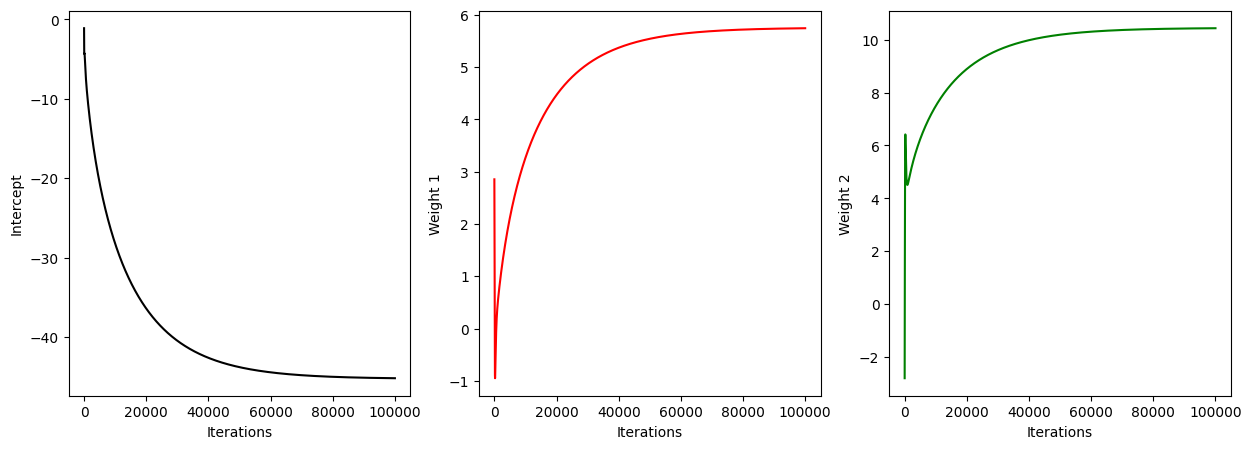

In [13]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15,5)
ax = axes[0]
ax.plot(it, int_hist, 'k')
ax.set_xlabel('Iterations')
ax.set_ylabel('Intercept')
ax = axes[1]
ax.plot(it, coef1_hist, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Weight 1')
ax = axes[2]
ax.plot(it, coef2_hist, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Weight 2')
plt.show()

The parameter vector $\beta$ converged to the optimal values after about 100000 iterations, which is 200 times larger than what our first dataset needed to converge. This is because the Newton-Raphson method is not the most efficient one in finding the optimal values, so it takes a large number of iterations to converge, since it has to calculate the gradient vector and the Hessian matrix each time we iterate. The time complexity of this calculation is roughly $O(nj^2)$ where n is the number of samples and j is the number of independent variables. scikit-learn uses the L-BFGS algorithm by default, which has a time complexity of $O(np)$, and we can choose between a variety of other solvers that are time efficient and effective.

Now, we can plot the logistic function that our model creates and the decision boundary.

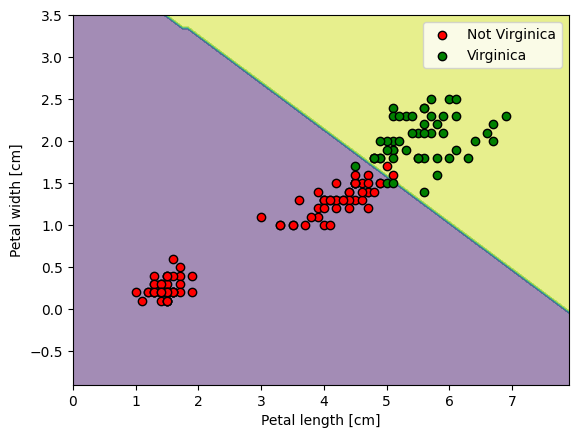

In [174]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method = 'predict', xlabel = 'Petal length [cm]', ylabel = 'Petal width [cm]', alpha = 0.5)
plt.scatter(X[idx_0, 0], X[idx_0, 1], c = 'red' , edgecolors = 'black', label = 'Not Virginica')
plt.scatter(X[idx_1, 0], X[idx_1, 1], c = 'green' , edgecolors = 'black', label = 'Virginica')
plt.legend()
plt.show()

The purple area of our plot is the zone where the logistic function that was fit to our data predicts that our species is not Virginica (probability is lower than 0.5), while the yellow zone is where our model predicts that it is Virginica (probability higher than 0.5). The line that divides these zones is the decision boundary of our model and it is the line where the logistic function equals 0.5. It is easy to see that the model separates our data really well. We could escalate this to higher dimensions and the concept would still hold true, even though we could not visualize it.

## **Coefficient of determination ($R^2$) for logistic regression**

In linear regression analysis, we saw that it was really easy to calculate an $R^2$ value that gave us information about how well the dependent variable was explained by independent variables. In logistic regression it is not that easy, since the residuals when we work with the log-likelihoods to get a linear space are infinite. Because of this, there is not a consensus on the best way to get a value that explains the same as $R^2$, there are over 10 different $R^2$'s and none is better than another one. For this example we will calculate McFadden's Pseudo $R^2$, since it is very similar to good old linear regression $R^2$. To start off, we obtain the log-likelihood of our data given the best fitting sigmoid. This is given by the formula:
$$ l(\beta) = \sum_{i = 1}^n y_i log(p(x_i)) + (1-y_i)log(1-p(x_i))  $$
We calculate this for our estimated best parameter vector $\beta$ and this would be analogous to our SSR(fit) of the $R^2$ equation. For our baseline fit (analogous to SSR(mean)), we can consider the overall probability without taking the independent variable into account, obtained as the number of samples labeled as 1 over the total number of samples. We then calculate the log-likelihood considering this probability for every sample and we have our baseline metric. From then, calculating McFadden's Pseudo $R^2$ is the same as calculating $R^2$:
$$ R^2 = 1 - \frac{l_{fit}}{l_{overall}} $$
The interpretation of this $R^2$ value is similar to linear regression, models that do poorly in explaining the probability of a certain event have an $R^2$ close to 0, while models that are good in explaining this probability have values that are close to 1. Expanding on the $R^2$ concept, we can also calculate an adjusted pseudo-$R^2$ that compensates for additional independent variables with the equation:
$$ R^2 = 1 - \frac{l_{fit} - K}{l_{overall}} $$
where K is the number of independent variables in our dataset.

In [46]:
Px = 1/(1 + np.exp(-1*np.dot(beta, des.T)))
lf = np.dot(y, np.log(Px)) + np.dot((1 - y), (np.log(1 - Px)))
p1 = len(y[idx_1])/len(y)
lo = np.sum(np.dot(y, np.log(p1)) + np.dot((1 - y), (np.log(1 - p1))))
r2 = 1 - (lf-2)/lo

print(f'McFadden\'s adjusted pseudo-R² for our logistic regression sigmoid: {r2:.4f}')

McFadden's adjusted pseudo-R² for our logistic regression sigmoid: 0.8714


The $R^2$ value that we got is pretty high, meaning that our logistic regression fit is pretty good at predicting probabilities. Calculating a p-value for McFadden's Pseudo $R^2$ is pretty straight forward.

$ 2(l_{fit} - l_{overall})$ is equal to a Chi-squared value from a distribution whose degrees of freedom are equal to the number of parameters in the fitted sigmoid minus the number of parameters in the overall probability line when converted to a log-likelihood range. Below, we will calculate the p-value that accompanies this $R^2$.

In [67]:
import scipy.stats as stats

c2v = 2*(lf - lo)
df = 3-1 
p = stats.distributions.chi2.sf(c2v, df)

print(f'p-value for R²: {p:.37f}')

p-value for R²: 0.0000000000000000000000000000000000001


For our Iris dataset, the p-value of the obtained McFadden's pseudo $R^2$ is in the order of $10^{-37}$, so we can very confidently say that our $R^2$ value is statistically significant.